<a href="https://colab.research.google.com/github/CODER-AsHuToSh/UnderGraduate_Project/blob/master/UG_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Welcome to Ashutosh UG Project Part 2 Code.")

Welcome to Ashutosh UG Project Part 2 Code.


In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.4 MB/s eta 0:00:00


**Import Libraries**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import catboost
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

**Mounting Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**

In [5]:
df=pd.read_excel('/content/drive/MyDrive/Undergradute_Project_Part2_Data.xlsx')

In [6]:
df.shape


(826542, 5)

In [7]:
df.head()

,Cycle,Strain (%),Fibre Concentration,Axial Strain,Deviator Stress in Kpa
0,0.0,-0.01,0.0,0.4,0.0
1,0.0,-0.01,0.0,0.4,0.0
2,0.0,-0.01,0.0,0.4,0.0
3,0.0,-0.01,0.0,0.4,0.0
4,0.0,-0.01,0.0,0.4,0.0


In [8]:
df = df.sample(frac=1.0, random_state=42)
df = df.reset_index(drop=True)
df.head()

,Cycle,Strain (%),Fibre Concentration,Axial Strain,Deviator Stress in Kpa
0,110.0,-0.56,8.0,0.6,-21.899669
1,41.0,-0.79,1.0,0.8,-1.018589
2,212.0,0.81,0.5,0.4,8.658009
3,200.0,0.09,10.0,0.4,-2.546473
4,64.0,0.60,1.0,0.6,13.241660


In [9]:
# df=df.iloc[0:10000,:]

In [10]:
df.shape

(826542, 5)

In [11]:
df.columns

Index(['Cycle', 'Strain (%)', 'Fibre Concentration', 'Axial Strain',
       'Deviator Stress in Kpa'],
      dtype='object')

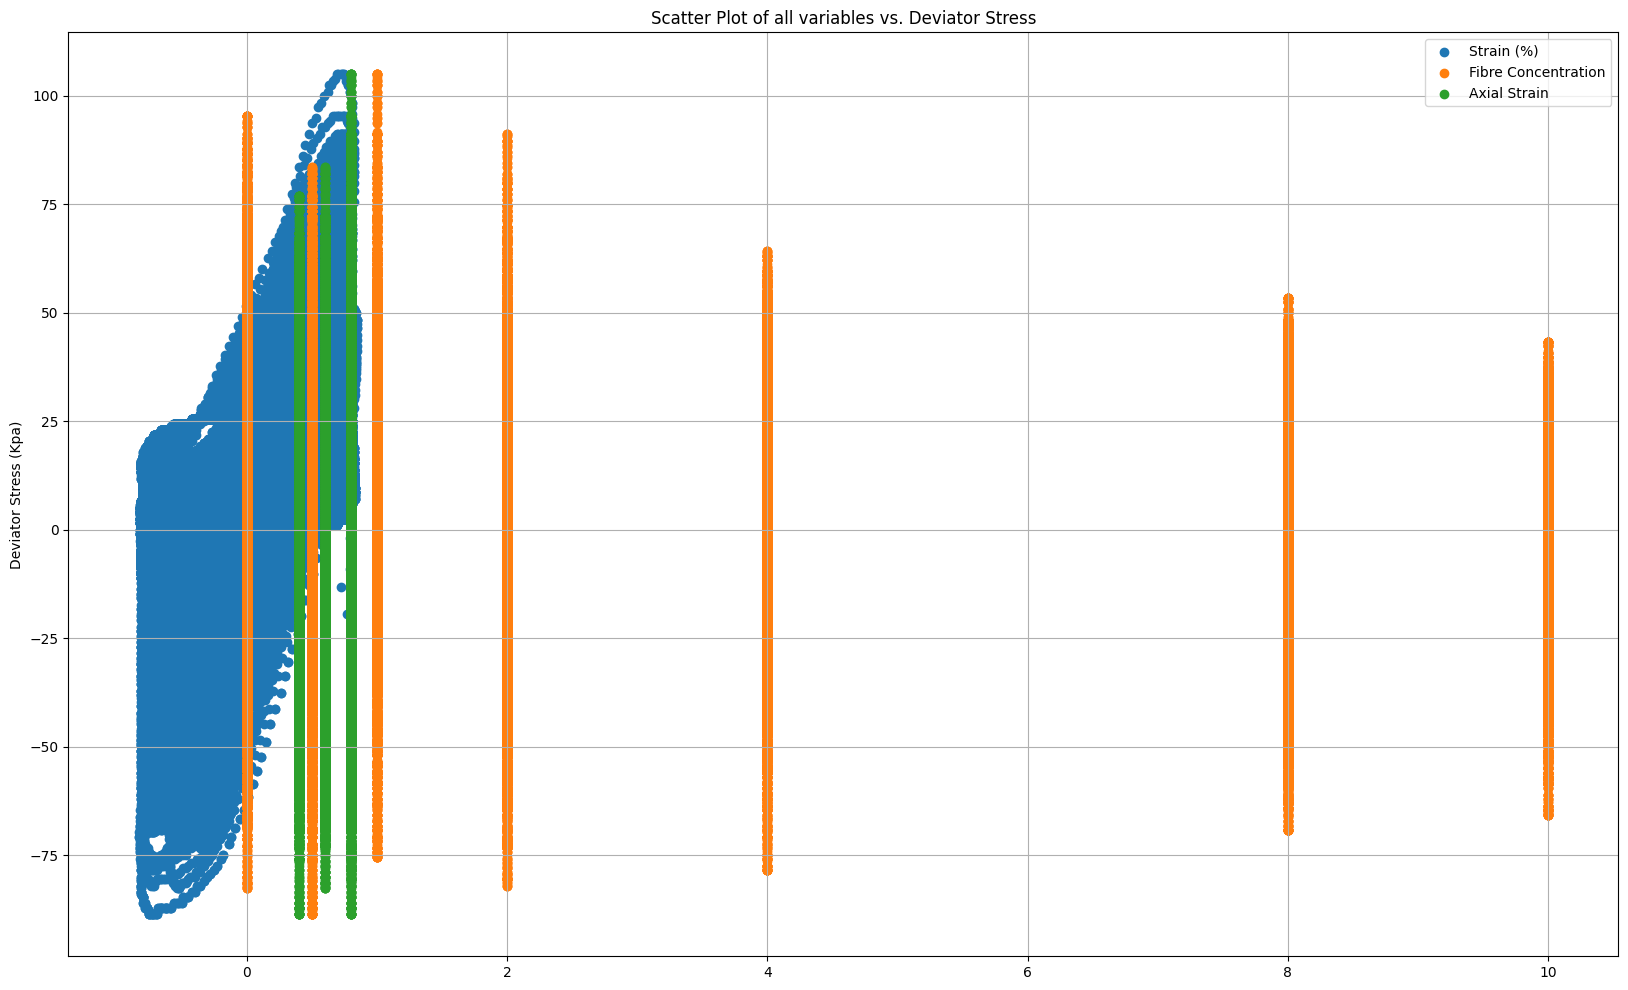

In [ ]:
plt.figure(figsize=(20, 12))
plt.scatter(df['Strain (%)'], df['Deviator Stress in Kpa'], label='Strain (%)')
plt.scatter(df['Fibre Concentration'], df['Deviator Stress in Kpa'], label='Fibre Concentration')
plt.scatter(df['Axial Strain'], df['Deviator Stress in Kpa'], label='Axial Strain')
plt.ylabel('Deviator Stress (Kpa)')
plt.title('Scatter Plot of all variables vs. Deviator Stress')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
val1=min(df['Deviator Stress in Kpa'])
val1

-88.61726508785333

In [ ]:
val2=max(df['Deviator Stress in Kpa'])
val2

104.91469314998729

<Figure size 2000x1200 with 0 Axes>

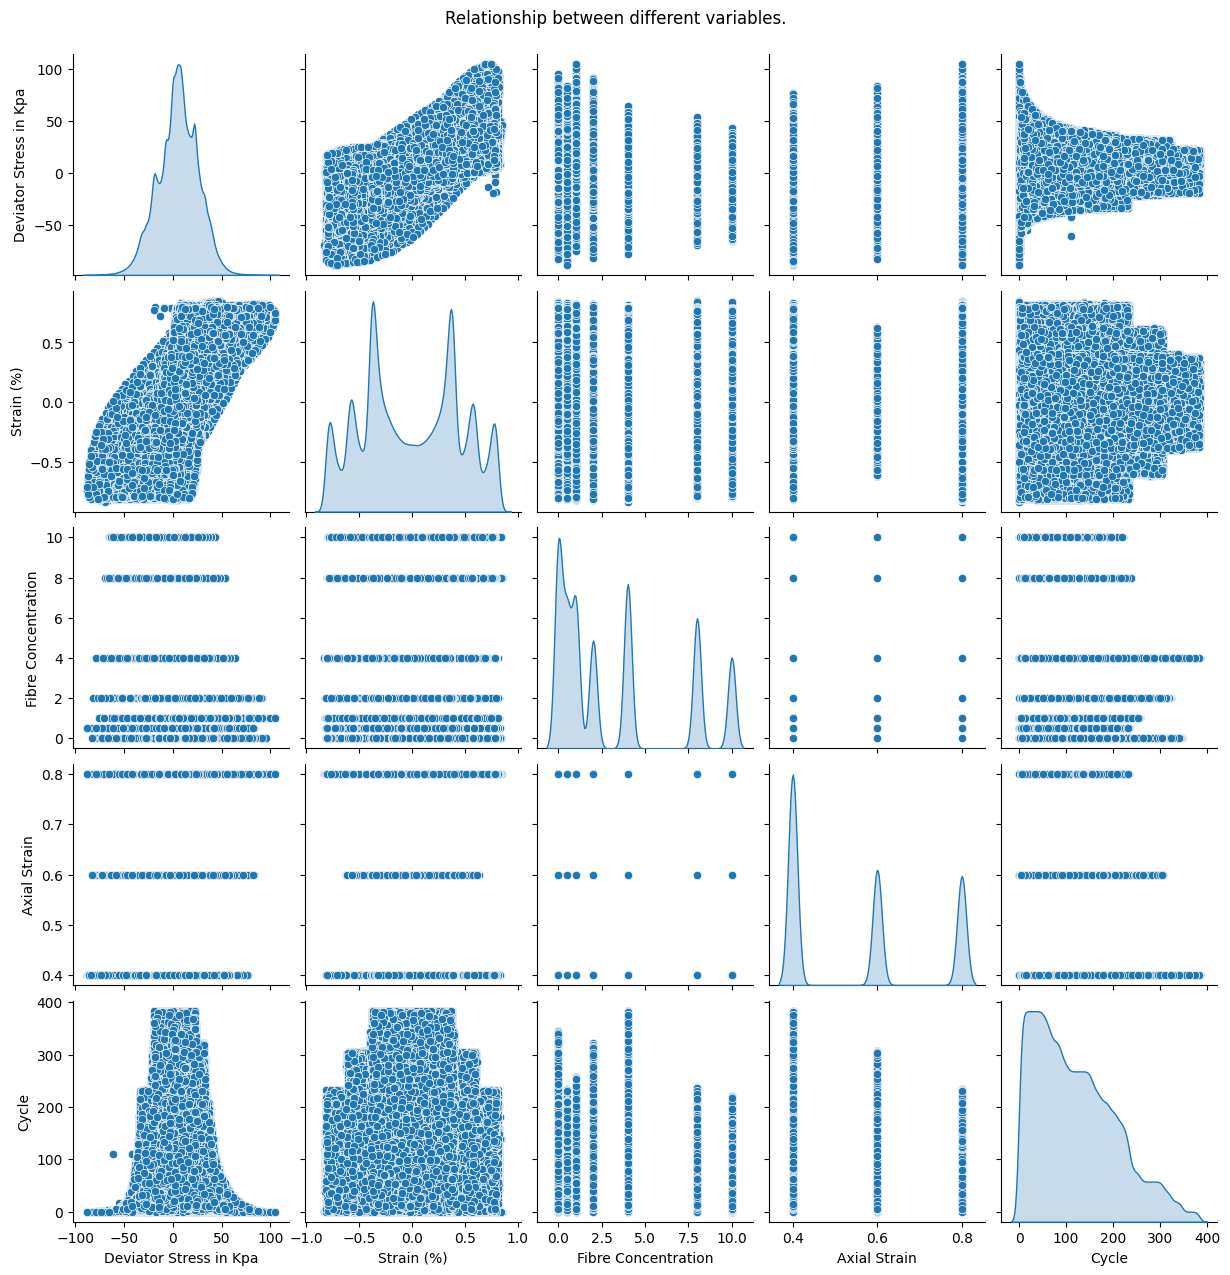

In [ ]:
plt.figure(figsize=(20, 12))
sns.pairplot(df[['Deviator Stress in Kpa', 'Strain (%)', 'Fibre Concentration', 'Axial Strain', 'Cycle']], diag_kind='kde')
plt.suptitle('Relationship between different variables.', y=1.02)
plt.show()


<Figure size 2000x1200 with 0 Axes>

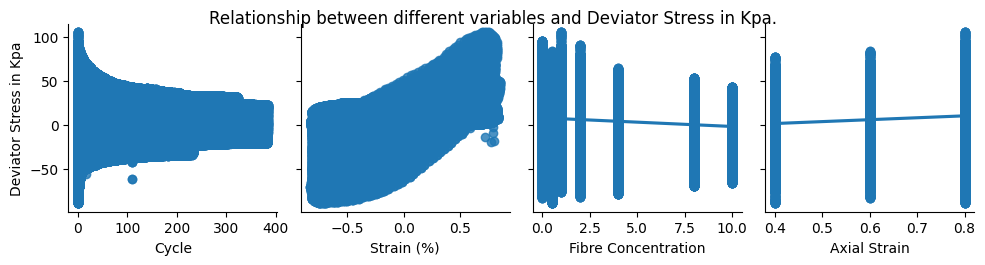

In [16]:
plt.figure(figsize=(20, 12))
sns.pairplot(df, x_vars=['Cycle', 'Strain (%)', 'Fibre Concentration', 'Axial Strain'],
             y_vars=['Deviator Stress in Kpa'], kind='reg')
plt.suptitle('Relationship between different variables and Deviator Stress in Kpa.', y=1.02)
plt.show()


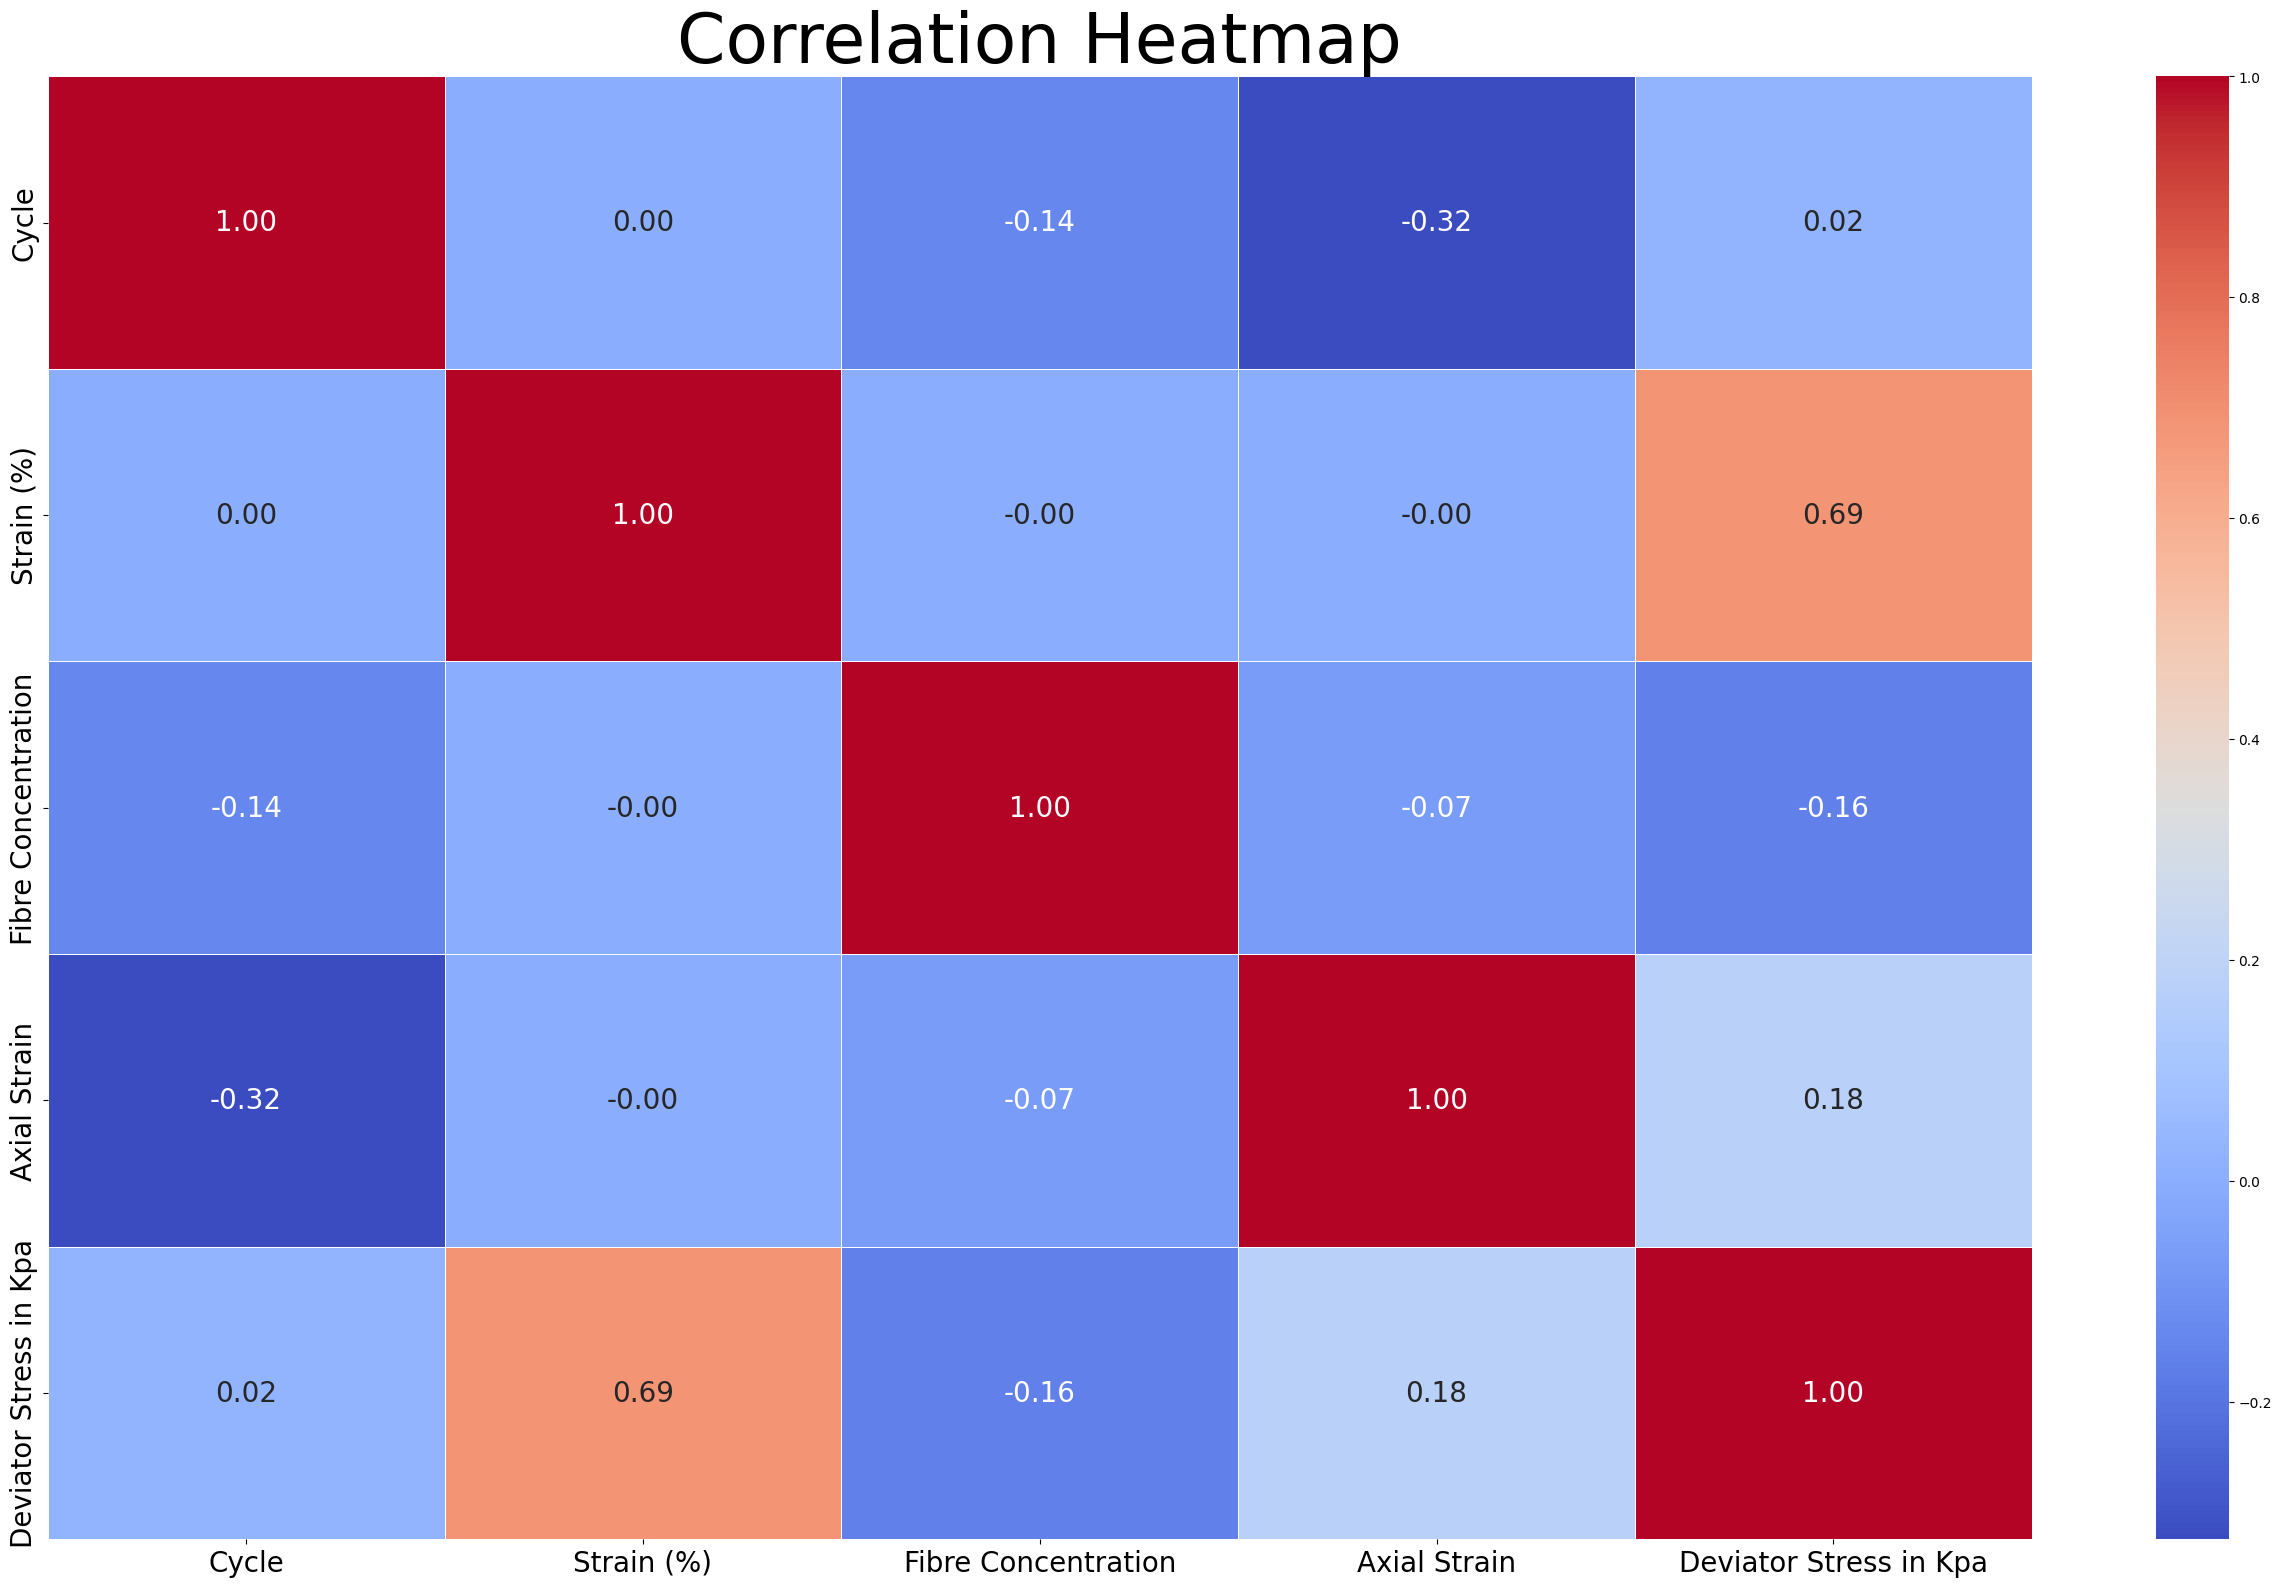

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(32, 19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"size": 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Correlation Heatmap',fontsize=50)
plt.show()

**LightGBM model**

In [27]:
# Define your feature variables (X) and target variable (y)
X = df.drop('Deviator Stress in Kpa', axis=1)
y = df['Deviator Stress in Kpa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train=y_train.values
y_test=y_test.values

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define LightGBM parameters
params = {
    "objective": "regression",
    "metric": "rmse",  # Root Mean Squared Error
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "num_threads": 4
}

# Train the LightGBM model
num_round = 1000  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred = bst.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 661233, number of used features: 4
[LightGBM] [Info] Start training from score 5.010685
Root Mean Squared Error: 8.051274484677009


In [28]:

# Calculate the range of the target variable (replace with your actual min and max values)
min_target = min(y)  # Replace 'y' with your target variable
max_target = max(y)

range_target = max_target - min_target

# Calculate RMSE as a percentage
rmse_percentage = (rmse / range_target) * 100

print(f"RMSE as a percentage: {rmse_percentage:.2f}%")


RMSE as a percentage: 4.16%


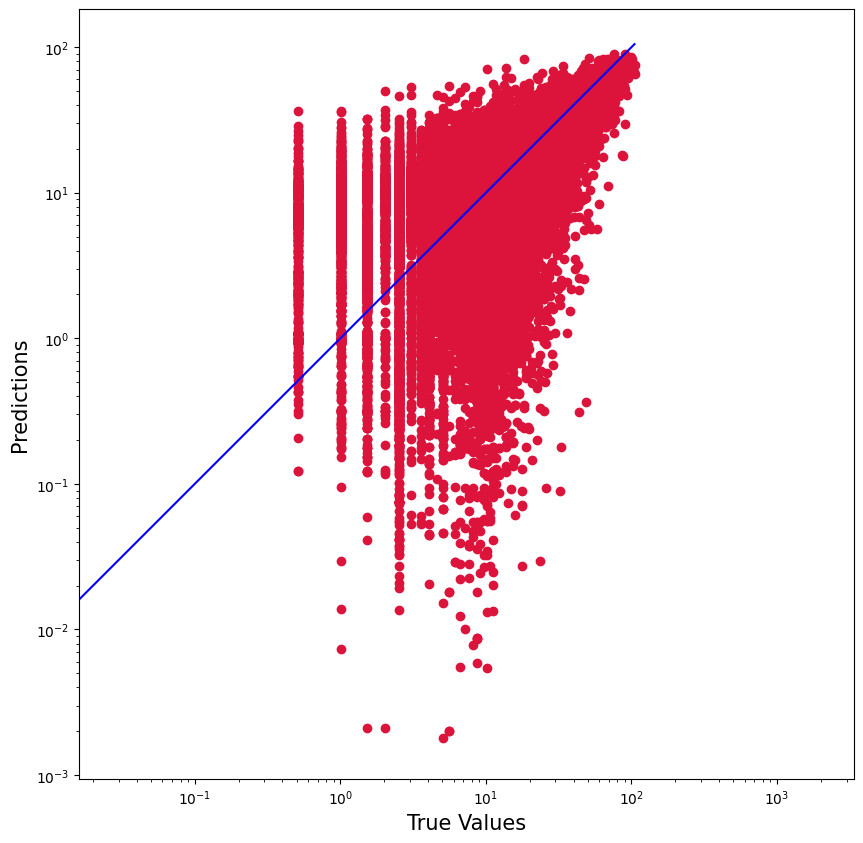

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**CatBoost model**

In [33]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train=y_train.values
y_test=y_test.values
# Create a CatBoost dataset
train_data = catboost.Pool(data=X_train, label=y_train)

# Define CatBoost parameters
params = {
    "iterations": 1000,  # Number of boosting iterations
    "learning_rate": 0.05,
    "depth": 6,  # Depth of the trees
    "loss_function": "RMSE",  # Loss function for regression
    "eval_metric": "RMSE",  # Evaluation metric
    "verbose": 200  # Print progress every 200 iterations
}

# Train the CatBoost model
model = CatBoostRegressor(**params)
model.fit(train_data)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


0:	learn: 19.8218487	total: 191ms	remaining: 3m 10s
200:	learn: 8.2149969	total: 28.8s	remaining: 1m 54s
400:	learn: 8.0220259	total: 49s	remaining: 1m 13s
600:	learn: 7.9773810	total: 1m 9s	remaining: 45.9s
800:	learn: 7.9577080	total: 1m 28s	remaining: 22s
999:	learn: 7.9435723	total: 1m 48s	remaining: 0us
Root Mean Squared Error: 7.972363817646309


In [34]:

# Calculate the range of the target variable (replace with your actual min and max values)
min_target = min(y)  # Replace 'y' with your target variable
max_target = max(y)

range_target = max_target - min_target

# Calculate RMSE as a percentage
rmse_percentage = (rmse / range_target) * 100

print(f"RMSE as a percentage: {rmse_percentage:.2f}%")


RMSE as a percentage: 4.12%


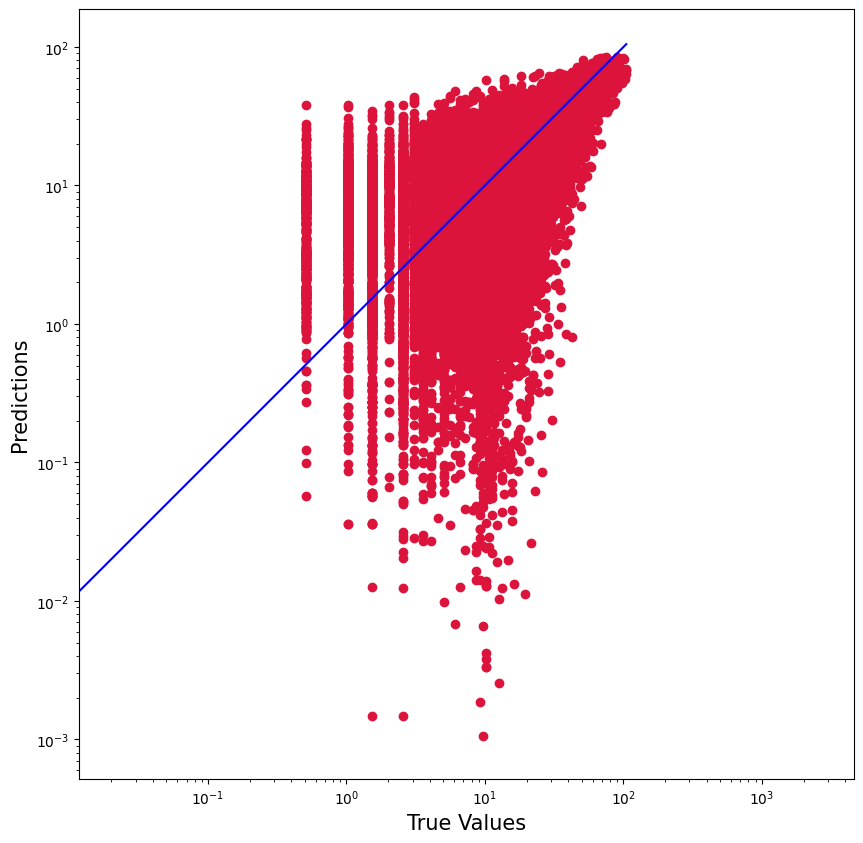

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
sum_error=0
errors=[]
for i in range(len(y_pred)):
  per=abs(y_pred[i]-y_test[i])
  errors.append(per)


errors.sort()



In [ ]:
def plot_errors_graph(errors):
  plt.plot(errors)
  plt.xlabel("Number of objects")

  plt.ylabel("Errors")
  plt.legend('Error Value')
  plt.show()

plot_errors_graph(errors)

**Artificial Neural Network**

In [36]:


# Load your dataset (replace 'your_dataset.csv' with the actual data file)

# Define your feature variables (X) and target variable (Y)
X = df[['Cycle', 'Strain (%)', 'Fibre Concentration', 'Axial Strain']]
Y = df['Deviator Stress in Kpa']

imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer to fill missing values in X
X = imputer.fit_transform(X)

# Convert X and Y to NumPy arrays



# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train=Y_train.values
Y_test=Y_test.values


# Define the CNN model for regression
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Reshape the input data to match the model's input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



# Train the CNN model
history=model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

Epoch 1/10
20664/20664 [==============================] - 55s 3ms/step - loss: 127.0001
Epoch 2/10
20664/20664 [==============================] - 51s 2ms/step - loss: 89.2635
Epoch 3/10
20664/20664 [==============================] - 52s 3ms/step - loss: 83.5908
Epoch 4/10
20664/20664 [==============================] - 52s 3ms/step - loss: 79.7179
Epoch 5/10
20664/20664 [==============================] - 51s 2ms/step - loss: 76.5403
Epoch 6/10
20664/20664 [==============================] - 50s 2ms/step - loss: 74.3347
Epoch 7/10
20664/20664 [==============================] - 54s 3ms/step - loss: 72.7665
Epoch 8/10
20664/20664 [==============================] - 55s 3ms/step - loss: 71.4858
Epoch 9/10
20664/20664 [==============================] - 54s 3ms/step - loss: 70.3299
Epoch 10/10
5166/5166 [==============================] - 10s 2ms/step
Root Mean Squared Error: 8.2616


In [37]:

# Calculate the range of the target variable (replace with your actual min and max values)
min_target = min(y)  # Replace 'y' with your target variable
max_target = max(y)

range_target = max_target - min_target

# Calculate RMSE as a percentage
rmse_percentage = (rmse / range_target) * 100

print(f"RMSE as a percentage: {rmse_percentage:.2f}%")


RMSE as a percentage: 4.27%


In [63]:
sum_error=0
errors=[]
for i in range(len(Y_pred)):
  per=abs(Y_pred[i]-Y_test[i])
  errors.append(per)


errors.sort()



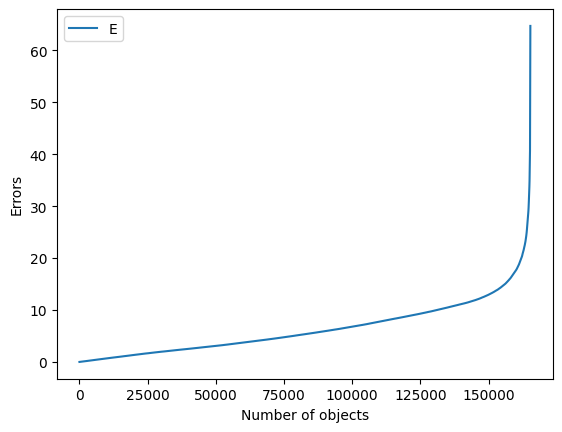

In [64]:
def plot_errors_graph(errors):
  plt.plot(errors)
  plt.xlabel("Number of objects")

  plt.ylabel("Errors")
  plt.legend('Error Value')
  plt.show()

plot_errors_graph(errors)

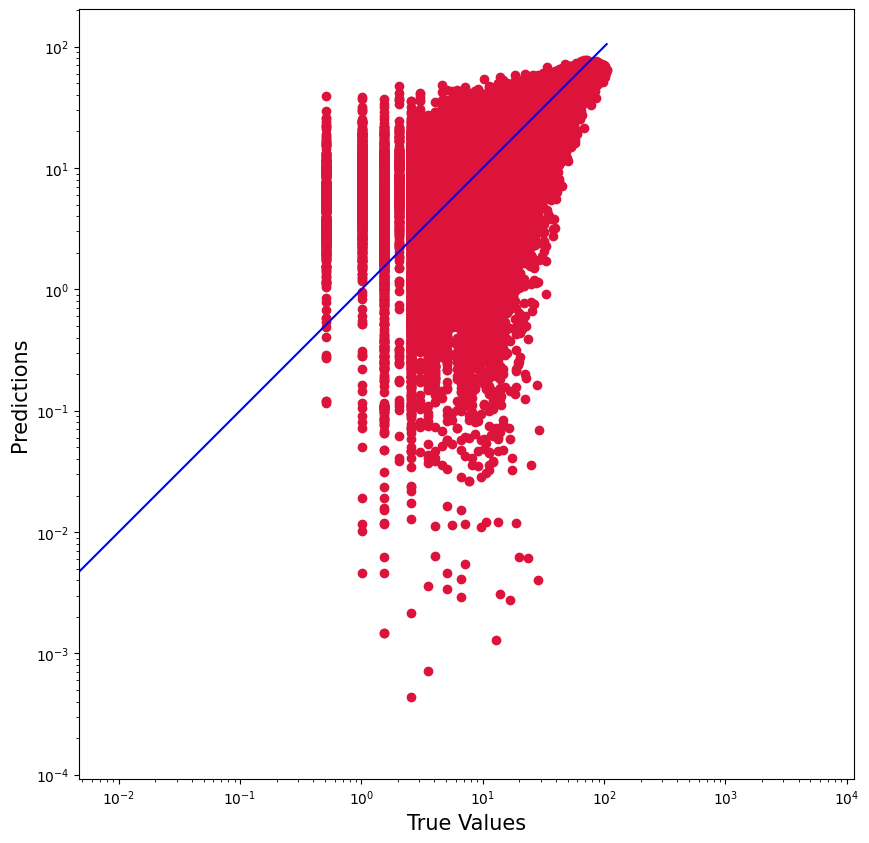

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_test), max(Y_pred))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Convolutional Neural Network**

In [65]:


# Load your dataset (replace 'your_dataset.csv' with the actual data file)


# Define your feature variables (X) and target variable (Y)
X = df[['Cycle', 'Strain (%)', 'Fibre Concentration', 'Axial Strain']]
Y = df['Deviator Stress in Kpa']

imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer to fill missing values in X
X = imputer.fit_transform(X)

# Convert X and Y to NumPy arrays
# X = X.values
# Y = Y.values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the neural network
history=model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")


Epoch 1/10
20664/20664 [==============================] - 62s 3ms/step - loss: 123.2083
Epoch 2/10
20664/20664 [==============================] - 61s 3ms/step - loss: 84.3777
Epoch 3/10
20664/20664 [==============================] - 48s 2ms/step - loss: 74.1246
Epoch 4/10
20664/20664 [==============================] - 51s 2ms/step - loss: 71.0284
Epoch 5/10
20664/20664 [==============================] - 49s 2ms/step - loss: 69.1853
Epoch 6/10
20664/20664 [==============================] - 50s 2ms/step - loss: 68.1500
Epoch 7/10
20664/20664 [==============================] - 51s 2ms/step - loss: 67.4420
Epoch 8/10
20664/20664 [==============================] - 51s 2ms/step - loss: 66.9610
Epoch 9/10
20664/20664 [==============================] - 55s 3ms/step - loss: 66.7084
Epoch 10/10
5166/5166 [==============================] - 10s 2ms/step
Root Mean Squared Error: 8.1435


In [66]:

# Calculate the range of the target variable (replace with your actual min and max values)
min_target = min(y)  # Replace 'y' with your target variable
max_target = max(y)

range_target = max_target - min_target

# Calculate RMSE as a percentage
rmse_percentage = (rmse / range_target) * 100

print(f"RMSE as a percentage: {rmse_percentage:.2f}%")


RMSE as a percentage: 4.21%


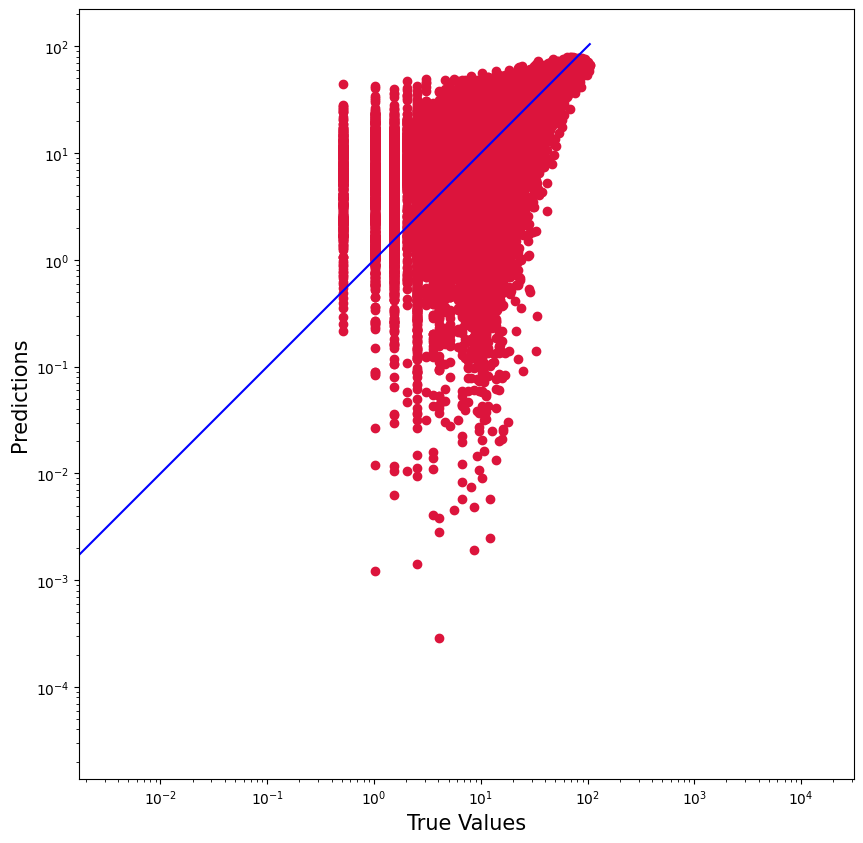

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_test), max(Y_pred))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [69]:
Y_train=Y_train.values
Y_test=Y_test.values
sum_error=0
errors=[]
for i in range(len(Y_pred)):
  per=abs(Y_pred[i]-Y_test[i])
  errors.append(per)


errors.sort()



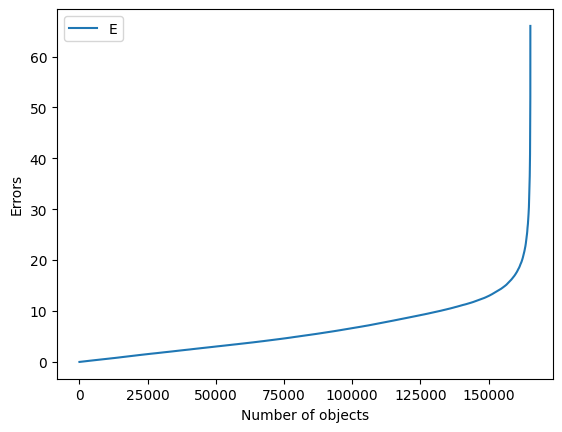

In [70]:
def plot_errors_graph(errors):
  plt.plot(errors)
  plt.xlabel("Number of objects")

  plt.ylabel("Errors")
  plt.legend('Error Value')
  plt.show()

plot_errors_graph(errors)